In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

In [2]:
dataset = np.genfromtxt('./Dados/bostonbin.csv', delimiter=',')

In [3]:
X = dataset[:, 0:17]
y = dataset[:, -1]

In [4]:
class xscale():
 def __init__(self):
  self.mean = None
  self.dp = None
 def fit(self, data):
  self.mean = data.mean(axis=0)
  self.dp = data.std(axis=0)
 def transform(self, data):
  return (data - self.mean) / self.dp

 def inversa(self, data):
  return (data * self.dp) + self.mean

In [5]:
def divTrainTest(X, y, size = 0.30):
 randomi = np.random.permutation(len(y))
 limiar = int(len(y) * size)
 X_test = X[randomi][0:limiar]
 X_train = X[randomi][limiar:]
 y_test = y[randomi][0:limiar]
 y_train = y[randomi][limiar:]
 return X_train, X_test, y_train, y_test

## Questão1 - Support Vector Machine (SVM)

In [6]:
#Divisão de treino e teste
X_train, X_test, y_train, y_test = divTrainTest(X, y, size = 0.30)

In [7]:
schedr_X = xscale()
schedr_X.fit(X_train)
X_train_sched = schedr_X.transform(X_train)
X_test_sched = schedr_X.transform(X_test)

In [8]:
# Grid-search para ajustar os hiperparâmetros
C = [2**-5,2**-3,2**-1,2,2**2,2**4,2**6,2**8,2**10,2**12,2**14,2**16]
gamma = [2**-15,2**-13,2**-11,2**-9,2**-7,2**-5,2**-3,2**-1,2,2**2,2**4]

svmGrid = {
    'C':C,
    'gamma': gamma
}

In [9]:
svm = SVC(kernel='rbf')

In [10]:
gscv = GridSearchCV(svm, svmGrid, cv=10)
gscv.fit(X_train_sched, y_train)
y_pred_svm = gscv.best_estimator_.predict(X_test_sched)

In [11]:
gscv.best_params_

{'C': 4, 'gamma': 0.03125}

### Métricas da avaliação do modelo no treino

In [12]:
y_pred_svm_train = gscv.best_estimator_.predict(X_train_sched)

acc = accuracy_score(y_train, y_pred_svm_train)
revocacao = recall_score(y_train, y_pred_svm_train)
f1 = f1_score(y_train, y_pred_svm_train)
precisao = precision_score(y_train, y_pred_svm_train)

print("A acurácia do modelo é de: {} ".format(acc))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))
print("A precisão do modelo é de: {}".format(precisao))

A acurácia do modelo é de: 0.9154929577464789 
A revocacão do modelo é de: 0.9356435643564357
O f1_score do modelo é de: 0.926470588235294
A precisão do modelo é de: 0.9174757281553398


### Métricas da avaliação do modelo no teste

In [13]:
acc = accuracy_score(y_test, y_pred_svm)
revocacao = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
precisao = precision_score(y_test, y_pred_svm)

print("A acurácia do modelo é de: {} ".format(acc))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))
print("A precisão do modelo é de: {}".format(precisao))

A acurácia do modelo é de: 0.8675496688741722 
A revocacão do modelo é de: 0.8641975308641975
O f1_score do modelo é de: 0.8749999999999999
A precisão do modelo é de: 0.8860759493670886


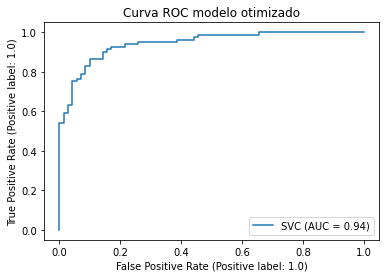

In [14]:
plot_roc_curve(gscv.best_estimator_, X_test_sched, y_test)
plt.title("Curva ROC modelo otimizado")
plt.show()

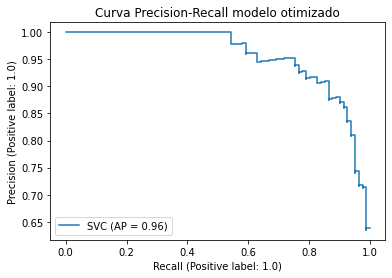

In [15]:
plot_precision_recall_curve(gscv.best_estimator_, X_test_sched, y_test)
plt.title("Curva Precision-Recall modelo otimizado")
plt.show()

## Questão3 - Random Forest

In [16]:
classifiers = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
maxDepth = [2,4,6,8,None]

rfcGrid = {
    'n_estimators':classifiers,
    'max_depth': maxDepth
}

In [17]:
rfc  = RandomForestClassifier()

In [18]:
gscv_rfc = GridSearchCV(rfc, rfcGrid, cv=10)
gscv_rfc.fit(X_train, y_train)
y_pred_rfc = gscv_rfc.best_estimator_.predict(X_test)

In [19]:
gscv_rfc.best_params_

{'max_depth': None, 'n_estimators': 10}

### Métricas da avaliação do modelo no treino

In [20]:
y_pred_rfc_train = gscv_rfc.best_estimator_.predict(X_train)

acc = accuracy_score(y_train, y_pred_rfc_train)
revocacao = recall_score(y_train, y_pred_rfc_train)
f1 = f1_score(y_train, y_pred_rfc_train)
precisao = precision_score(y_train, y_pred_rfc_train)

print("A acurácia do modelo é de: {} ".format(acc))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))
print("A precisão do modelo é de: {}".format(precisao))

A acurácia do modelo é de: 0.9859154929577465 
A revocacão do modelo é de: 0.9801980198019802
O f1_score do modelo é de: 0.9875311720698253
A precisão do modelo é de: 0.9949748743718593


### Métricas da avaliação do modelo no teste

In [21]:
y_pred_rfc_test = gscv_rfc.best_estimator_.predict(X_test)

acc = accuracy_score(y_test, y_pred_rfc_test)
revocacao = recall_score(y_test, y_pred_rfc_test)
f1 = f1_score(y_test, y_pred_rfc_test)
precisao = precision_score(y_test, y_pred_rfc_test)

print("A acurácia do modelo é de: {} ".format(acc))
print("A revocacão do modelo é de: {}".format(revocacao))
print("O f1_score do modelo é de: {}".format(f1))
print("A precisão do modelo é de: {}".format(precisao))

A acurácia do modelo é de: 0.8675496688741722 
A revocacão do modelo é de: 0.8271604938271605
O f1_score do modelo é de: 0.8701298701298701
A precisão do modelo é de: 0.9178082191780822


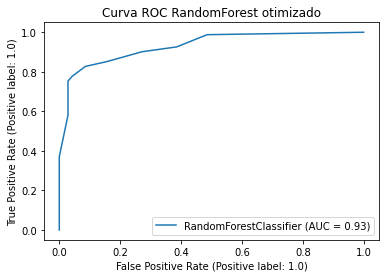

In [22]:
plot_roc_curve(gscv_rfc.best_estimator_, X_test, y_test)
plt.title("Curva ROC RandomForest otimizado")
plt.show()

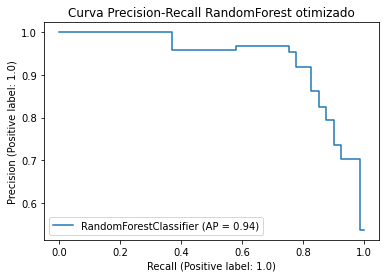

In [23]:
plot_precision_recall_curve(gscv_rfc.best_estimator_, X_test, y_test)
plt.title("Curva Precision-Recall RandomForest otimizado")
plt.show()